<a href="https://colab.research.google.com/github/rajasreekalli/sales_predicions/blob/main/Sales_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
df = pd.read_csv('/content/drive/MyDrive/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
types = df.dtypes
print(types)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [4]:
print(df.drop_duplicates())

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


In [5]:
item_missing = df.isna()
print(item_missing.sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [6]:
new_df=df.loc[0:8522,:].fillna(method='ffill')
print(new_df)

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


In [8]:
address_missing=df.loc[0:8522,:].fillna(method='ffill')
print(address_missing)

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


In [9]:
final_missing = new_df.isna()
print(final_missing.sum())
print(address_missing)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834

In [10]:
ohe_df = pd.get_dummies(new_df, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first = True)
ohe_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,2778.3834,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,549.2850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,1193.1136,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,1845.5976,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [11]:
feature_names = {'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'}
new_df.loc[:, feature_names]

,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_MRP,Item_Identifier,Outlet_Establishment_Year,Outlet_Location_Type
0,Dairy,Low Fat,9.300,0.016047,OUT049,Medium,Supermarket Type1,249.8092,FDA15,1999,Tier 1
1,Soft Drinks,Regular,5.920,0.019278,OUT018,Medium,Supermarket Type2,48.2692,DRC01,2009,Tier 3
2,Meat,Low Fat,17.500,0.016760,OUT049,Medium,Supermarket Type1,141.6180,FDN15,1999,Tier 1
3,Fruits and Vegetables,Regular,19.200,0.000000,OUT010,Medium,Grocery Store,182.0950,FDX07,1998,Tier 3
4,Household,Low Fat,8.930,0.000000,OUT013,High,Supermarket Type1,53.8614,NCD19,1987,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...
8518,Snack Foods,Low Fat,6.865,0.056783,OUT013,High,Supermarket Type1,214.5218,FDF22,1987,Tier 3
8519,Baking Goods,Regular,8.380,0.046982,OUT045,High,Supermarket Type1,108.1570,FDS36,2002,Tier 2
8520,Health and Hygiene,Low Fat,10.600,0.035186,OUT035,Small,Supermarket Type1,85.1224,NCJ29,2004,Tier 2
8521,Snack Foods,Regular,7.210,0.145221,OUT018,Medium,Supermarket Type2,103.1332,FDN46,2009,Tier 3


In [12]:
# Build and evaluate a simple decision tree model.
X = new_df.loc[:, feature_names].values
X.shape

(8523, 11)

In [13]:
y = new_df.loc[:, 'Item_Outlet_Sales'].values
y.shape

(8523,)

In [14]:
y = ohe_df['Item_Outlet_Sales']
X = ohe_df.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])

In [15]:
print(X.shape)
print(y.shape)

(8523, 30)
(8523,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [18]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [20]:
train_sales = dec_tree.predict(X_train)
test_sales = dec_tree.predict(X_test)

In [21]:
dec_tree.get_depth()

36

In [22]:
dec_tree.get_n_leaves()

6231

In [23]:
dec_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

0.8556774630607085
0.3661296614748639


In [24]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

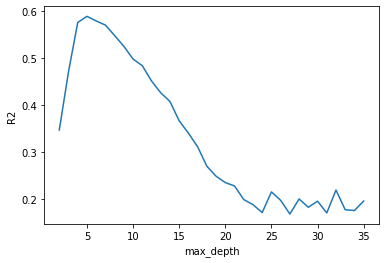

In [25]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [26]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print(train_6_score)
print(test_6_score)

0.6258195529434545
0.5789500268193499


In [27]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree_6.predict(X_train))))

print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, dec_tree_6.predict(X_test))))

Training RMSE: 1052.316710198879
Testing RMSE: 1077.8067141361732


In [28]:
rf = RandomForestRegressor(random_state = 42)

In [29]:

rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [30]:
rf.predict(X_test)

array([ 881.359408,  915.002282,  750.6895  , ..., 4058.137554,
       1937.870822, 2156.938996])

In [31]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.936677243546331
0.5457110738856209


In [32]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))

print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

Training RMSE: 432.8982476438968
Testing RMSE: 1119.5413477186305


In [33]:
# Build and evaluate a bagged tree model.
from sklearn.ensemble import BaggingRegressor

In [34]:
bagreg = BaggingRegressor(random_state = 42)
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [35]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [36]:
bagreg.predict(X_test)

array([ 708.34462, 1101.16662,  749.82396, ..., 4484.96196, 1755.51486,
       2746.7579 ])

In [40]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9177708496942939
0.519151194950634


In [41]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))

print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))

Training RMSE: 493.3087551935338
Testing RMSE: 1151.803339116609


The r squared values for the simple decision tree model are in line with showing some correlation between the variables tested here(testing characteristics vs item prices)(0.58-0.59) and has RMSE values that are also similar to each other. As stated above the 2 other models we made the random and the bagged have issues of overfitting potentially. The model from last week has an r squared of around 0.42 which is ok but the 0.59 is indicative of a stronger relationship between X and Y. Hence its probably best to recommend it.